## Introducción

Por medio de este análisis, se buscará determinar si la vacunación contra la **COVID-19 es efectiva en la prevención de fallecimientos en hospitales del Perú**. Se evaluará si los pacientes que han fallecido en hospitales debido a la enfermedad son principalmente individuos **no vacunados** (sin dosis) o **vacunados** (con dosis). En este análisis también se analizará cómo la edad puede influir en el riesgo de fallecimiento y como afecto a las regiones según DIRESA.

In [1]:
from platform import python_version
print(python_version())

3.10.9


# Hospitalizados, vacunados y fallecidos por COVID-19

In [2]:
import locale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Extraer datos

In [3]:
locale.setlocale(locale.LC_TIME, 'spanish_Spain')
# Extraemos los datos del archivo  TB_HOSP_VAC_FALLECIDOS.csv
Ruta = r'C:\Users\Johan\PythonProyect\Dataset\Covid19\Hospitalizados, vacunados y fallecidos por COVID-19\TB_HOSP_VAC_FALLECIDOS.csv'
df_HFV = pd.read_csv(Ruta)
df_HFV.head(200)

,eess_renaes,eess_diresa,eess_red,eess_nombre,id_eess,id_persona,edad,sexo,fecha_ingreso_hosp,flag_uci,...,fabricante_dosis3,fecha_dosis4,fabricante_dosis4,cdc_positividad,cdc_fecha_fallecido_covid,cdc_fallecido_covid,ubigeo_inei_domicilio,dep_domicilio,prov_domicilio,dist_domicilio
0,5576,UCAYALI,NO PERTENECE A NINGUNA RED,HOSPITAL REGIONAL DE PUCALLPA,5573,175780,72.0,F,2/03/2021,1,...,NaN,NaN,NaN,0,19/03/2021,1,250107,UCAYALI,CORONEL PORTILLO,MANANTAY
1,5945,LIMA DIRIS ESTE,NO PERTENECE A NINGUNA RED,HOSPITAL VITARTE,5942,45571,80.0,M,31/10/2020,0,...,ASTRAZENECA,NaN,NaN,1,NaN,0,250107,UCAYALI,CORONEL PORTILLO,MANANTAY
2,5576,UCAYALI,NO PERTENECE A NINGUNA RED,HOSPITAL REGIONAL DE PUCALLPA,5573,45671,68.0,M,9/07/2021,1,...,ASTRAZENECA,NaN,NaN,1,NaN,0,250107,UCAYALI,CORONEL PORTILLO,MANANTAY
3,6918,SAN MARTIN,NO PERTENECE A NINGUNA RED,HOSPITAL TARAPOTO,6893,446607,59.0,M,7/11/2020,0,...,PFIZER,11/07/2022,MODERNA,1,NaN,0,220910,SAN MARTIN,SAN MARTIN,MORALES
4,6918,SAN MARTIN,NO PERTENECE A NINGUNA RED,HOSPITAL TARAPOTO,6893,465640,91.0,F,5/09/2020,0,...,PFIZER,NaN,NaN,0,NaN,0,220910,SAN MARTIN,SAN MARTIN,MORALES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1900,TUMBES,TUMBES,ZORRITOS,1900,143039,65.0,M,16/03/2021,0,...,NaN,NaN,NaN,1,28/03/2021,1,240201,TUMBES,CONTRALMIRANTE VILLAR,ZORRITOS
196,2864,TACNA,NO PERTENECE A NINGUNA RED,HOSPITAL HIPOLITO UNANUE DE TACNA,2862,144879,55.0,F,17/08/2020,1,...,ASTRAZENECA,20/01/2023,PFIZER,1,NaN,0,230103,TACNA,TACNA,CALANA
197,1472,ANCASH,HUAYLAS SUR,HOSPITAL DE APOYO RECUAY,1472,32379698,36.0,M,15/07/2021,0,...,PFIZER,19/11/2022,MODERNA,1,NaN,0,21701,ANCASH,RECUAY,RECUAY
198,4074,HUANCAVELICA,TAYACAJA,HOSPITAL DE PAMPAS,4071,33821171,27.0,F,24/06/2021,0,...,PFIZER,NaN,NaN,0,NaN,0,90714,HUANCAVELICA,TAYACAJA,SALCABAMBA


In [4]:
# Número de filas y columnas
print(df_HFV.shape)
# Lista con los nombres de la columnas
print(list(df_HFV.columns))

(149763, 32)
['eess_renaes', 'eess_diresa', 'eess_red', 'eess_nombre', 'id_eess', 'id_persona', 'edad', 'sexo', 'fecha_ingreso_hosp', 'flag_uci', 'fecha_ingreso_uci', 'fecha_ingreso_ucin', 'con_oxigeno', 'con_ventilacion', 'fecha_segumiento_hosp_ultimo', 'evolucion_hosp_ultimo', 'flag_vacuna', 'fecha_dosis1', 'fabricante_dosis1', 'fecha_dosis2', 'fabricante_dosis2', 'fecha_dosis3', 'fabricante_dosis3', 'fecha_dosis4', 'fabricante_dosis4', 'cdc_positividad', 'cdc_fecha_fallecido_covid', 'cdc_fallecido_covid', 'ubigeo_inei_domicilio', 'dep_domicilio', 'prov_domicilio', 'dist_domicilio']


In [5]:
# Cantidad de datos vacíos por columna
df_HFV.isnull().sum()

eess_renaes                          0
eess_diresa                          0
eess_red                             0
eess_nombre                          0
id_eess                              0
id_persona                           0
edad                              9571
sexo                              8387
fecha_ingreso_hosp                   0
flag_uci                             0
fecha_ingreso_uci               135759
fecha_ingreso_ucin              141930
con_oxigeno                          6
con_ventilacion                     15
fecha_segumiento_hosp_ultimo         1
evolucion_hosp_ultimo             2267
flag_vacuna                          0
fecha_dosis1                     54494
fabricante_dosis1                54494
fecha_dosis2                     58796
fabricante_dosis2                58796
fecha_dosis3                     73139
fabricante_dosis3                73139
fecha_dosis4                    117213
fabricante_dosis4               117213
cdc_positividad          

## Transformar datos

In [6]:
# Quitamos todas las celdas sin datos de la columna 'cdc_fecha_fallecido_covid' que contiene la fecha de fallecimiento por covid
df_HFV.drop(df_HFV[df_HFV['cdc_fecha_fallecido_covid'].isnull()].index,inplace=True)

print('La cantidad de filas se redujo de 149763 a {}'.format(df_HFV.shape[0]))
# Cantidad de datos vacíos en la columna 'cdc_fecha_fallecido_covid'
print('Datos vacíos en la columna "cdc_fecha_fallecido_covid" es de {}'.format(df_HFV.cdc_fecha_fallecido_covid.isnull().sum()))
df_HFV.reset_index(drop=True)

La cantidad de filas se redujo de 149763 a 38499
Datos vacíos en la columna "cdc_fecha_fallecido_covid" es de 0


,eess_renaes,eess_diresa,eess_red,eess_nombre,id_eess,id_persona,edad,sexo,fecha_ingreso_hosp,flag_uci,...,fabricante_dosis3,fecha_dosis4,fabricante_dosis4,cdc_positividad,cdc_fecha_fallecido_covid,cdc_fallecido_covid,ubigeo_inei_domicilio,dep_domicilio,prov_domicilio,dist_domicilio
0,5576,UCAYALI,NO PERTENECE A NINGUNA RED,HOSPITAL REGIONAL DE PUCALLPA,5573,175780,72.0,F,2/03/2021,1,...,NaN,NaN,NaN,0,19/03/2021,1,250107,UCAYALI,CORONEL PORTILLO,MANANTAY
1,6918,SAN MARTIN,NO PERTENECE A NINGUNA RED,HOSPITAL TARAPOTO,6893,429961,73.0,M,26/03/2021,1,...,NaN,NaN,NaN,1,10/04/2021,1,220201,SAN MARTIN,BELLAVISTA,BELLAVISTA
2,2084,PIURA,PIURA CASTILLA,HOSPITAL DE LA AMISTAD PERU - COREA SANTA ROSA...,2084,508794,59.0,F,20/05/2021,0,...,NaN,NaN,NaN,1,24/05/2021,1,200404,PIURA,MORROPON,LA MATANZA
3,2864,TACNA,NO PERTENECE A NINGUNA RED,HOSPITAL HIPOLITO UNANUE DE TACNA,2862,406578,51.0,M,8/07/2021,0,...,NaN,NaN,NaN,1,16/07/2021,1,230101,TACNA,TACNA,TACNA
4,2864,TACNA,NO PERTENECE A NINGUNA RED,HOSPITAL HIPOLITO UNANUE DE TACNA,2862,135302,84.0,F,12/02/2022,1,...,NaN,NaN,NaN,1,15/03/2022,1,230108,TACNA,TACNA,POCOLLAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38494,2289,CUSCO,NO PERTENECE A NINGUNA RED,HOSPITAL DE APOYO DEPARTAMENTAL CUSCO,2288,35390727,73.0,M,2/02/2022,1,...,PFIZER,NaN,NaN,1,29/03/2022,1,81206,CUSCO,QUISPICANCHI,CUSIPATA
38495,3358,ICA,NO PERTENECE A NINGUNA RED,HOSPITAL REGIONAL DE ICA,3356,35279305,71.0,M,4/10/2021,0,...,PFIZER,NaN,NaN,1,13/05/2022,1,110107,ICA,ICA,PUEBLO NUEVO
38496,2289,CUSCO,NO PERTENECE A NINGUNA RED,HOSPITAL DE APOYO DEPARTAMENTAL CUSCO,2288,35384712,74.0,F,22/04/2021,0,...,NaN,NaN,NaN,0,23/04/2021,1,81103,CUSCO,PAUCARTAMBO,CHALLABAMBA
38497,7633,LIMA DIRIS NORTE,NO PERTENECE A NINGUNA RED,HOSPITAL NACIONAL CAYETANO HEREDIA,7437,36729264,69.0,F,28/02/2021,0,...,NaN,NaN,NaN,1,3/03/2021,1,150135,LIMA,LIMA,SAN MARTIN DE PORRES


In [7]:
# Crea un filtro entre 'flag_vacuna' y 'fecha_dosis'
df_FechaDosis_vacio= df_HFV[(df_HFV['flag_vacuna']==0) & (df_HFV['fecha_dosis1']) |
                (df_HFV['flag_vacuna']==0) & (df_HFV['fecha_dosis2']) |
                (df_HFV['flag_vacuna']==0) & (df_HFV['fecha_dosis3']) |
                (df_HFV['flag_vacuna']==0) & (df_HFV['fecha_dosis4'])]
df_FechaDosis_vacio[['flag_vacuna','fecha_dosis1','fecha_dosis2','fecha_dosis3','fecha_dosis4']]

,flag_vacuna,fecha_dosis1,fecha_dosis2,fecha_dosis3,fecha_dosis4
23575,0,NaN,15/12/2021,NaN,NaN
23814,0,NaN,23/07/2021,NaN,NaN
26128,0,NaN,NaN,2/08/2022,NaN
26819,0,NaN,NaN,NaN,15/08/2022
27517,0,NaN,NaN,10/12/2021,NaN
37336,0,NaN,1/07/2021,NaN,NaN
38620,0,NaN,NaN,4/01/2022,NaN
39784,0,NaN,NaN,7/04/2022,NaN
47594,0,NaN,NaN,2/03/2022,NaN
63795,0,NaN,NaN,26/11/2021,NaN


Hay 12 filas con 4 columnas de fecha_dosis, sin embargo, no hay dato de las anteriores dosis y tampoco está registrado en la columna 'flag_vacuna' donde debería estar la cantidad de dosis que tiene la persona.

### Crear columna "n_dosis"

In [8]:
# Para cada celda no vacía en la 'conditions' se le asiganara los valores respectivos de 'values'
conditions = [(df_HFV['fecha_dosis4'].notnull()),
              (df_HFV['fecha_dosis3'].notnull()),
              (df_HFV['fecha_dosis2'].notnull()),
              (df_HFV['fecha_dosis1'].notnull())
              ]
values = [4,3,2,1]

df_HFV['n_dosis'] = np.select(conditions,values,default=0)

In [9]:
# Crea un filtro entre 'flag_vacuna' y 'fecha_dosis'
df_FechaDosis_vacio= df_HFV[(df_HFV['flag_vacuna']==0) & (df_HFV['fecha_dosis1']) |
                            (df_HFV['flag_vacuna']==0) & (df_HFV['fecha_dosis2']) |
                            (df_HFV['flag_vacuna']==0) & (df_HFV['fecha_dosis3']) |
                            (df_HFV['flag_vacuna']==0) & (df_HFV['fecha_dosis4'])]

df_FechaDosis_vacio[['flag_vacuna','n_dosis','fecha_dosis1','fecha_dosis2','fecha_dosis3','fecha_dosis4']]

,flag_vacuna,n_dosis,fecha_dosis1,fecha_dosis2,fecha_dosis3,fecha_dosis4
23575,0,2,NaN,15/12/2021,NaN,NaN
23814,0,2,NaN,23/07/2021,NaN,NaN
26128,0,3,NaN,NaN,2/08/2022,NaN
26819,0,4,NaN,NaN,NaN,15/08/2022
27517,0,3,NaN,NaN,10/12/2021,NaN
37336,0,2,NaN,1/07/2021,NaN,NaN
38620,0,3,NaN,NaN,4/01/2022,NaN
39784,0,3,NaN,NaN,7/04/2022,NaN
47594,0,3,NaN,NaN,2/03/2022,NaN
63795,0,3,NaN,NaN,26/11/2021,NaN


Con la creación de la columna "n_dosis" hemos solucionado el inconveniente de la columna "flag_vacuna", tomando como referencia la última dosis.

In [10]:
# Dar formato fecha a la columna 'cdc_fecha_fallecido_covid
column_date = pd.to_datetime(df_HFV['cdc_fecha_fallecido_covid'], format='%d/%m/%Y', errors='coerce')
# Crear la columna 'nombre_mes'
df_HFV['nombre_mes'] = column_date.dt.month_name(locale='spanish_Spain')
# Crear la columna 'año'
df_HFV['año'] = column_date.dt.year
df_HFV.head()

,eess_renaes,eess_diresa,eess_red,eess_nombre,id_eess,id_persona,edad,sexo,fecha_ingreso_hosp,flag_uci,...,cdc_positividad,cdc_fecha_fallecido_covid,cdc_fallecido_covid,ubigeo_inei_domicilio,dep_domicilio,prov_domicilio,dist_domicilio,n_dosis,nombre_mes,año
0,5576,UCAYALI,NO PERTENECE A NINGUNA RED,HOSPITAL REGIONAL DE PUCALLPA,5573,175780,72.0,F,2/03/2021,1,...,0,19/03/2021,1,250107,UCAYALI,CORONEL PORTILLO,MANANTAY,0,Marzo,2021
6,6918,SAN MARTIN,NO PERTENECE A NINGUNA RED,HOSPITAL TARAPOTO,6893,429961,73.0,M,26/03/2021,1,...,1,10/04/2021,1,220201,SAN MARTIN,BELLAVISTA,BELLAVISTA,0,Abril,2021
8,2084,PIURA,PIURA CASTILLA,HOSPITAL DE LA AMISTAD PERU - COREA SANTA ROSA...,2084,508794,59.0,F,20/05/2021,0,...,1,24/05/2021,1,200404,PIURA,MORROPON,LA MATANZA,0,Mayo,2021
24,2864,TACNA,NO PERTENECE A NINGUNA RED,HOSPITAL HIPOLITO UNANUE DE TACNA,2862,406578,51.0,M,8/07/2021,0,...,1,16/07/2021,1,230101,TACNA,TACNA,TACNA,0,Julio,2021
30,2864,TACNA,NO PERTENECE A NINGUNA RED,HOSPITAL HIPOLITO UNANUE DE TACNA,2862,135302,84.0,F,12/02/2022,1,...,1,15/03/2022,1,230108,TACNA,TACNA,POCOLLAY,2,Marzo,2022


### Crear columna 'vacunado_si_no' y 'grupo_edad'

In [11]:
df_HFV.edad.isnull().sum()

1233

In [12]:
# En la 'conditions2' para cada valor de 'n_dosis' que sea diferente a 0 sera 'Vacunado', de los contrario dera 'No Vacunado'
conditions2 = [(df_HFV['n_dosis'] != 0)]
values2= ['Vacunado']
df_HFV['vacunado_si_no'] = np.select(conditions2,values2,default='No Vacunado')

# En la columna edad tenemos 1233 valores vacíos, lo reeplazaremos por la media de la columna 'edad'
df_HFV['edad'].fillna(round(df_HFV['edad'].mean(),0), inplace=True)

# En la 'conditions3' para cada celda dentro del intervalo de edad se le asiganara los valores respectivos de 'values3'
conditions3 = [(df_HFV['edad'] <= 4),
               (df_HFV['edad'] >= 5)&(df_HFV['edad'] <= 11),
               (df_HFV['edad'] >= 12)&(df_HFV['edad'] <= 17),
               (df_HFV['edad'] >= 18)&(df_HFV['edad'] <= 29),
               (df_HFV['edad'] >= 30)&(df_HFV['edad'] <= 39),
               (df_HFV['edad'] >= 40)&(df_HFV['edad'] <= 49),
               (df_HFV['edad'] >= 50)&(df_HFV['edad'] <= 59),
               (df_HFV['edad'] >= 60)
               ]
values3= ['0-04','05-11','12-17','18-29','30-39','40-49','50-59','60+']
df_HFV['grupo_edad'] = np.select(conditions3,values3)
df_HFV[['edad','grupo_edad', 'vacunado_si_no']].head()

,edad,grupo_edad,vacunado_si_no
0,72.0,60+,No Vacunado
6,73.0,60+,No Vacunado
8,59.0,50-59,No Vacunado
24,51.0,50-59,No Vacunado
30,84.0,60+,Vacunado


De esta forma hemos "segmentado las edades" y se crea una columna de "vacunados_si_no".

### Ordenar los meses

In [13]:
# De forma predeterminada los meses no estan ordenados
# Para solucionar este detalle, vamos asiganrle un número de orden
mes_orden = {'Enero':1,
             'Febrero':2,
             'Marzo':3,
             'Abril':4,
             'Mayo':5,
             'Junio':6,
             'Julio':7,
             'Agosto':8,
             'Septiembre':9,
             'Octubre':10,
             'Noviembre':11,
             'Diciembre':12
             }
df_HFV.sort_values('nombre_mes', key = lambda x : x.apply (lambda x : mes_orden[x]), inplace=True)
df_HFV.reset_index(drop=True, inplace=True)

In [14]:
# Seleccionamos solo las columnas necesarias para este análisis
df_HFV=df_HFV[['año','nombre_mes','eess_diresa','edad','grupo_edad','n_dosis','vacunado_si_no']]
df_HFV.head()

,año,nombre_mes,eess_diresa,edad,grupo_edad,n_dosis,vacunado_si_no
0,2021,Enero,LIMA DIRIS NORTE,50.0,50-59,0,No Vacunado
1,2021,Enero,LIMA DIRIS CENTRO,55.0,50-59,0,No Vacunado
2,2021,Enero,TACNA,59.0,50-59,0,No Vacunado
3,2021,Enero,TACNA,59.0,50-59,0,No Vacunado
4,2021,Enero,PIURA,78.0,60+,0,No Vacunado


## Extraer: Visualización Gráfica

In [15]:
df_filtrado = df_HFV.query('año == 2021 or año == 2022')
#Crear tabla de cantidad de 'No Vacuandos' y 'Vacuanos' del 2021 al 2022
tabla_edad = pd.crosstab(index=[df_filtrado.año,df_filtrado.grupo_edad],
                         columns=df_filtrado.vacunado_si_no,
                         colnames=[None],
                         margins=True,
                         margins_name='Total',
                         dropna=True)

# Agregar subtotal por año a la tabla_edad
tabla_subtotal= tabla_edad.iloc[:-1, :].groupby(level=[0]).sum()
tabla_subtotal.index = pd.MultiIndex.from_product([tabla_subtotal.index, ['Subtotal']])
# Concatenar tabla_edad y tabla_subtotal
tabla_edad_subtotal = pd.concat([tabla_edad, tabla_subtotal])
# Ordenar los índices subtotales
tabla_edad_subtotal = tabla_edad_subtotal.sort_index(level=[0,1])
# Cambiar el nombre de "año" y "eess_diresa"
tabla_edad_subtotal = tabla_edad_subtotal.rename_axis(index={'año': 'Año','grupo_edad': 'Edad'}).reset_index()


#Crear tabla de porcentaje de 'No Vacuandos' y 'Vacuanos' del 2021 al 2022
tabla_edad_p = pd.crosstab(index=[df_filtrado.año,df_filtrado.grupo_edad],
                           columns=df_filtrado.vacunado_si_no,
                           colnames=[None],
                           normalize='index',
                           dropna=True).round(4)*100# multiplicamos los porcentajes por 100 y rendondemos a 2 decimales.

# Cambiar el nombre de los index "año" y "eess_diresa"
tabla_edad_p = tabla_edad_p.rename_axis(index={'año': 'Año','grupo_edad': 'Edad'}).reset_index()

# Cambiamos el nombre de las columnas 'No Vacunado' a 'No Vacunado (%)' y 'Vacunado' a 'Vacunado (%)'
tabla_edad_p.rename(columns={'No Vacunado':'No Vacunado (%)','Vacunado':'Vacunado (%)'}, inplace=True)


#Concatenar la tabla_edad_subtotal y tabla_edad_p
tabla_concatenada = pd.concat([tabla_edad_subtotal.set_index(['Año', 'Edad']),
                               tabla_edad_p.set_index(['Año', 'Edad'])],
                              axis=1)

# Cambiamos el orden de las columnas
tabla_concatenada = tabla_concatenada.reindex(columns=['No Vacunado','No Vacunado (%)','Vacunado','Vacunado (%)','Total'])

tabla_concatenada

No Vacunado  No Vacunado (%)  Vacunado  Vacunado (%)  Total
Año   Edad                                                                 
2021  0-04               16           100.00         0          0.00     16
      05-11              17           100.00         0          0.00     17
      12-17              24           100.00         0          0.00     24
      18-29             166            97.08         5          2.92    171
      30-39             688            97.59        17          2.41    705
      40-49            1852            96.71        63          3.29   1915
      50-59            3692            96.62       129          3.38   3821
      60+             13247            90.82      1339          9.18  14586
      Subtotal        19702              NaN      1553           NaN  21255
2022  0-04               17           100.00         0          0.00     17
      05-11              11            78.57         3         21.43     14
      12-17              10            90.91         1          9.09     11
      18-29              14            36.84        24         63.16     38
      30-39              15            22.39        52         77.61     67
      40-49              34            28.81        84         71.19    118
      50-59              78            36.79       134         63.21    212
      60+               415            26.20      1169         73.80   1584
      Subtotal          594              NaN      1467           NaN   2061
Total                 20296              NaN      3020           NaN  23316

Esta tabla presenta información sobre la cantidad de fallecidos por COVID-19 en hospitales, por año y rango de edad. Los datos corresponden a dos años consecutivos: 2021 y 2022.

En 2021, se reportaron un total de 21,255 fallecidos en hospitales a causa del COVID-19. El grupo etario más afectado fue el de mayores de 60 años, con un total de 13,247 fallecidos, lo que representa el 90.82% del total de fallecidos "no vacunado". En este grupo, 1,339 personas habían sido vacunadas, lo que representan el 9.18%. Los grupos etarios de 40-49 años y 50-59 años también presentaron un número significativo de fallecidos, con 1,915 y 3,821 fallecidos, respectivamente.

En 2022, se reportaron un total 2,061 fallecidos por COVID-19 en hospitales, lo que representa una disminución con respecto al año anterior. En este año, el grupo etario más afectado fue el de mayores de 60 años, con un total de 1,584 fallecidos. En este grupo, el 73.80% de las personas había sido vacunada. Los grupos etarios de 50-59 años y 40-49 años también presentaron un número significativo de fallecidos, con 212 y 118 fallecidos, respectivamente.

In [16]:
# Filtrar los datos del año 2021 y 2022
df_filtrado = df_HFV.query('año == 2021 or año == 2022')
#Crear tabla de cantidad de 'No Vacuandos' y 'Vacuanos' del 2021 al 2022
tabla_region = pd.crosstab(index=[df_filtrado.año,df_filtrado.eess_diresa],
                           columns=df_filtrado.vacunado_si_no,
                           colnames=[None],
                           margins=True,
                           margins_name='Total',
                           dropna=True)

# Cambiar el nombre de "año" y "eess_diresa"
tabla_region = tabla_region.rename_axis(index={'año': 'Año','eess_diresa': 'DIRESA'}).reset_index()


#Crear tabla de porcentaje de 'No Vacuandos' y 'Vacuanos' del 2021 al 2022
tabla_region_p = pd.crosstab(index=[df_filtrado.año,df_filtrado.eess_diresa],
                             columns=df_filtrado.vacunado_si_no,
                             colnames=[None],
                             normalize='index',
                             dropna=True).round(4)*100 # multiplicamos los porcentajes por 100 y rendondemos a 2 decimales.

# Cambiar el nombre de "año" y "eess_diresa"
tabla_region_p = tabla_region_p.rename_axis(index={'año': 'Año','eess_diresa': 'DIRESA'}).reset_index()

# Cambiamos el nombre de las columnas 'No Vacunado' a 'No Vacunado (%)' y 'Vacunado' a 'Vacunado (%)'
tabla_region_p.rename(columns={'No Vacunado':'No Vacunado (%)','Vacunado':'Vacunado (%)'}, inplace=True)


#Concatenar la tabla_region y tabla_region_p
tabla_concatenada = pd.concat([tabla_region.set_index(['Año', 'DIRESA']),
                               tabla_region_p.set_index(['Año', 'DIRESA'])],
                              axis=1)

# Cambiamos el orden de las columnas
tabla_concatenada = tabla_concatenada.reindex(columns=['No Vacunado','No Vacunado (%)','Vacunado','Vacunado (%)','Total'])

# Ordenamos de mayor a menor el 'años' y el 'Total'
tabla_concatenada.sort_values(by =['Año','Total'],ascending=[True,False], inplace=True)

# Crear un top 5 de las regiones con más fallecidos para los años 2021 y 2022
tabla_region_top = tabla_concatenada.groupby(['Año']).apply(lambda x: x.sort_values('Total', ascending=False).iloc[:5].reset_index(level=0,drop=True))

# Quitar la ultima fila de la tabla
tabla_region_top.drop('Total', inplace=True)

# Agregar nuevo índice
tabla_region_top.reset_index()

,Año,DIRESA,No Vacunado,No Vacunado (%),Vacunado,Vacunado (%),Total
0,2021,LIMA DIRIS CENTRO,2384,93.02,179,6.98,2563
1,2021,LIMA DIRIS SUR,2300,92.78,179,7.22,2479
2,2021,ANCASH,1734,93.93,112,6.07,1846
3,2021,JUNIN,1567,92.18,133,7.82,1700
4,2021,PIURA,1510,89.77,172,10.23,1682
5,2022,LIMA DIRIS SUR,61,25.63,177,74.37,238
6,2022,LIMA DIRIS CENTRO,77,32.49,160,67.51,237
7,2022,PIURA,64,27.59,168,72.41,232
8,2022,ANCASH,41,19.43,170,80.57,211
9,2022,JUNIN,42,22.58,144,77.42,186


En la tabla tenemos un top 5 para el año 2021 y 2022, con la mayor cantidad de fallecidos en los hospitales según la Dirección Regional de Salud (DIRESA).

Se observa que la cantidad y proporción de fallecidos en el año 2021 de los "No Vacunados" es mayor a los "Vacunados". Para el año 2022 la cantidad y proporción de fallecidos "No Vacunados" es menor a los "Vacunados".

C:\Users\Johan\anaconda3\envs\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 33.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Johan\anaconda3\envs\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 54.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Johan\anaconda3\envs\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 54.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Johan\anaconda3\envs\Python310\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 59.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Johan\anaconda3\envs\Python310\lib\

Text(0.5, 1.0, 'FALLECIDOS NO VACUNADOS Y VACUANDOS POR EDAD 2021')

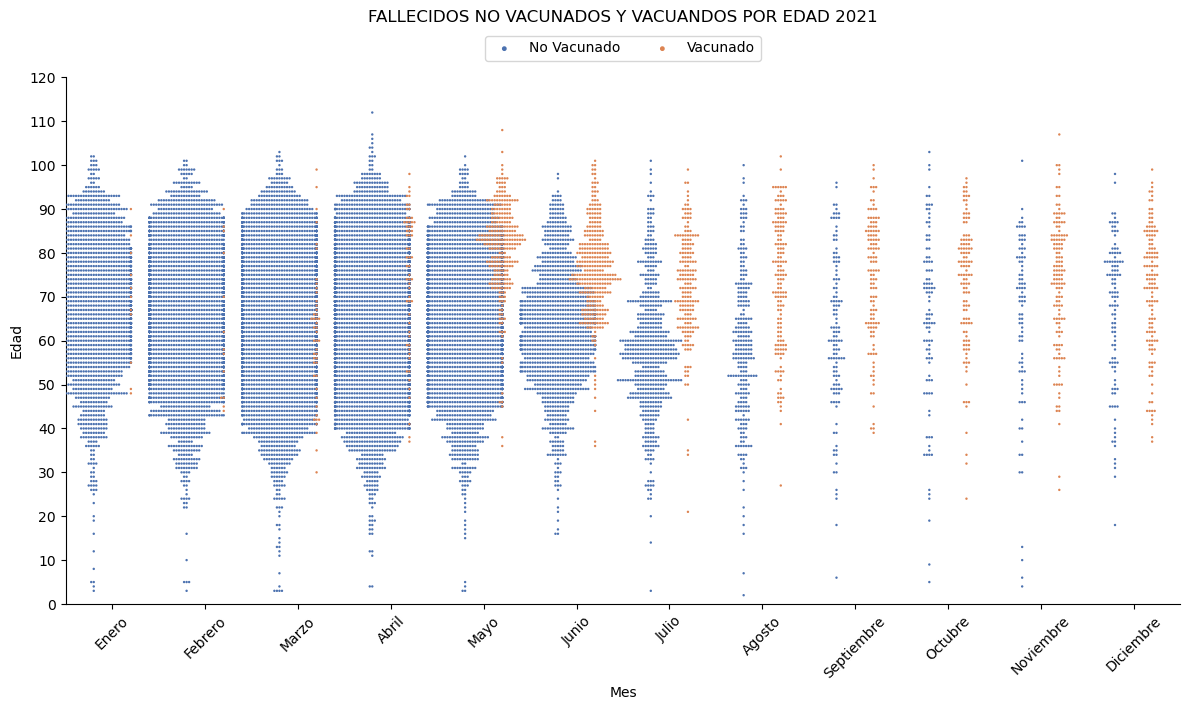

In [17]:
sns.catplot(data=df_HFV[df_HFV['año'] == 2021],
            x='nombre_mes',
            y='edad',
            hue='vacunado_si_no',
            hue_order = ['No Vacunado', 'Vacunado'],
            kind='swarm',
            s=3,
            height=6,
            aspect=2,
            legend=False,
            dodge=True,
            palette="deep")

plt.gca().legend(loc=9, ncol=2, borderaxespad = -3, labels=['No Vacunado', 'Vacunado'], markerscale=2)
plt.ylim(0, 120)
plt.yticks(range(0, 121, 10))
plt.xlabel("Mes")
plt.xticks(rotation = 45)
plt.ylabel("Edad")
plt.title('FALLECIDOS NO VACUNADOS Y VACUANDOS POR EDAD 2021', pad = 5*8)

La gráfica muestra dos grupos de puntos: uno que representa a los fallecidos "no vacunados" y otro que representa a los fallecidos "vacunados". Cada punto representa un individuo fallecido, su posición en el eje vertical indica la edad del fallecido y en el eje horizontal los meses del año 2021.

En general, se puede observar que la distribución de fallecidos "no vacunados" es mayor que la de fallecidos "vacunados" en el transcurso del año 2021, lo que sugiere que la vacunación puede estar reduciendo el riesgo de mortalidad por COVID-19 en las personas. Además, se puede ver que la diferencia entre ambos grupos se va reduciendo a medida que avanza el año, pero a partir del mes de septiembre la diferencia comienza a ser muy ajustada.

Es importante tener en cuenta que la mayoría de los fallecidos, tanto "no vacunados" como "vacunados", se encuentran en la franja de edad a partir de los 50 años. Esto sugiere que las personas mayores pueden estar en mayor riesgo de fallecer por COVID-19, independientemente de su estado de vacunación.

En conclusión, la gráfica sugiere que la vacunación puede estar reduciendo el riesgo de mortalidad por COVID-19 en las personas, especialmente en aquellos que se encuentran en mayor riesgo de fallecer por la enfermedad debido a su edad. Sin embargo, se necesitaría una evaluación más completa para determinar el verdadero impacto de la vacunación en la prevención de muertes por COVID-19.

Cabe destacar que los datos presentados corresponden exclusivamente a la situación en hospitales y no incluyen fallecidos fuera de estos centros de atención médica.

Text(0.5, 1.0, 'FALLECIDOS NO VACUNADOS Y VACUANDOS POR EDAD 2022')

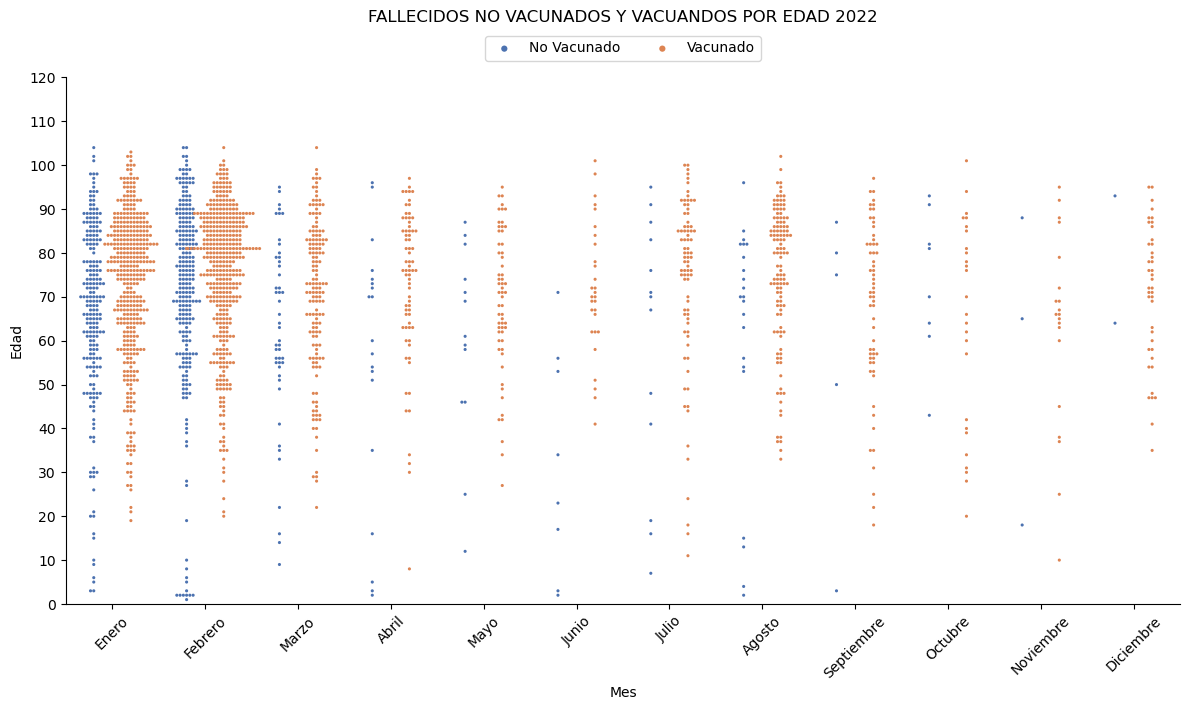

In [18]:
sns.catplot(data=df_HFV[df_HFV['año'] == 2022],
            x='nombre_mes',
            y='edad',
            hue='vacunado_si_no',
            hue_order = ['No Vacunado', 'Vacunado'],
            kind='swarm',
            s=5,
            height=6,
            aspect=2,
            legend=False,
            dodge=True,
            palette="deep")

plt.gca().legend(loc=9, ncol=2, borderaxespad = -3, labels=['No Vacunado', 'Vacunado'], markerscale=2)
plt.ylim(0, 120)
plt.yticks(range(0, 121, 10))
plt.xlabel("Mes")
plt.xticks(rotation = 45)
plt.ylabel("Edad")
plt.title('FALLECIDOS NO VACUNADOS Y VACUANDOS POR EDAD 2022', pad = 5*8)

La gráfica muestra dos grupos de puntos: uno que representa a los fallecidos "no vacunados" y otro que representa a los fallecidos "vacunados". Cada punto representa un individuo fallecido y su posición en el eje vertical indica la edad del fallecido, mientras que el eje horizontal representa los meses del año 2022.

En general, se puede observar que la distribución de fallecidos "no vacunados" es menor que la de fallecidos "vacunados" durante todo el año 2022, lo que sugiere que la vacunación puede no estar reduciendo significativamente el riesgo de mortalidad por COVID-19 en las personas. Además, se puede ver que hay una mayor distribución de fallecidos a partir de los 50 años, lo que coincide con la tendencia observada en el año anterior.

En conclusión, la gráfica sugiere que la vacunación puede no estar siendo efectiva para reducir el riesgo de mortalidad por COVID-19 en las personas en el año 2022, especialmente en aquellos que se encuentran en mayor riesgo debido a su edad. Pecado

Cabe destacar que los datos presentados corresponden exclusivamente a la situación en hospitales y no incluyen fallecidos fuera de estos centros de atención médica.

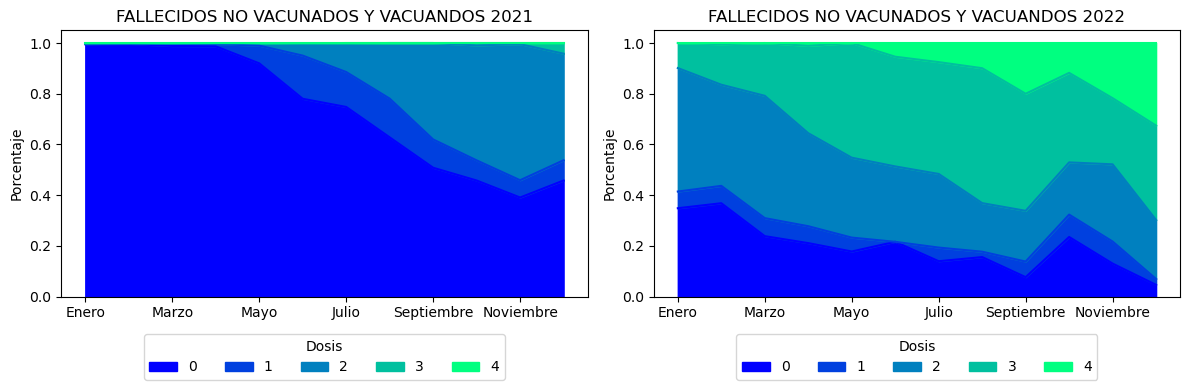

In [19]:
# crear una lista con el orden deseado para los meses
orden_meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
               'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

# convertir la columna "mes" a un tipo categórico con el orden deseado para los meses
df_HFV['nombre_mes'] = pd.Categorical(df_HFV['nombre_mes'], categories=orden_meses, ordered=True)

df_filtrado = df_HFV.query('año == 2021 or año == 2022')

tabla_dosis = pd.crosstab(index=[df_filtrado.año,df_filtrado.nombre_mes],
                                   columns=df_filtrado.n_dosis,
                                   normalize="index")

# crear figura y subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

# graficar tabla para el año 2021
tabla_dosis.loc[2021].plot.area(ax=axs[0], colormap='winter')
axs[0].set_title('FALLECIDOS NO VACUNADOS Y VACUANDOS 2021')
axs[0].set_xlabel(None)
axs[0].set_ylabel('Porcentaje')
axs[0].legend(title='Dosis',loc=8, ncol=5, borderaxespad = -6)

# graficar tabla para el año 2022
tabla_dosis.loc[2022].plot.area(ax=axs[1], colormap='winter')
axs[1].set_title('FALLECIDOS NO VACUNADOS Y VACUANDOS 2022')
axs[1].set_xlabel(None)
axs[1].set_ylabel('Porcentaje')
axs[1].legend(title='Dosis',loc=8, ncol=5, borderaxespad = -6)

plt.tight_layout()
plt.show()

La gráfica muestra cinco áreas que representan la proporción de fallecidos según la cantidad de dosis de vacuna recibida. El valor 0 representa a los no vacunados, mientras que los valores 1, 2, 3 y 4 representan a aquellos que han recibido una, dos, tres y cuatro dosis de la vacuna, respectivamente.

Durante el año 2021, se observa un declive drástico en la proporción de fallecidos "no vacunados" en relación con los "vacunados", lo que sugiere que la vacunación podría no estar reduciendo significativamente el riesgo de mortalidad por COVID-19 en los hospitales. Este declive se mantiene durante todo el período 2022, lo que sugiere que la vacunación sigue siendo poco efectiva para reducir la mortalidad por COVID-19 en los hospitales a medida que se reciben más dosis.

En conclusión, el gráfico de área sugiere que la vacunación no es una medida efectiva para reducir el riesgo de mortalidad en los hospitales, especialmente en aquellos que reciben múltiples dosis de vacuna. Esto destaca que la vacunación como herramienta clave no prevé la mortalidad en el contexto de la pandemia de COVID-19.

In [20]:
def bar_covid(año_covid,ejex,ejey):
    # crear una lista con el orden deseado para los meses
    mes_orden = {'Enero':1,
                 'Febrero':2,
                 'Marzo':3,
                 'Abril':4,'Mayo':5,
                 'Junio':6,
                 'Julio':7,
                 'Agosto':8,
                 'Septiembre':9,
                 'Octubre':10,
                 'Noviembre':11,
                 'Diciembre':12
                 }

    # Filtrar la columna año
    df_HFV_año = df_HFV[df_HFV['año']== año_covid]

    # Crar la tabla de 'no vacunados' y 'vacunados por mes'
    t_vacuandos_sino = pd.crosstab(index=df_HFV_año[ejex],
                            columns=df_HFV_año[ejey])
    #Aplicar lista orden para ordenar la columna mes de la tabla
    t_vacuandos_sino.sort_values(ejex, key = lambda x : x.apply (lambda x : mes_orden[x]), inplace=True)

    # Crar la tabla con el porcetahe de 'no vacunados' y 'vacunados por mes'
    p_vacuandos_sino = pd.crosstab(index=df_HFV_año[ejex],
                                 columns=df_HFV_año[ejey],
                                 normalize="index")
    #Aplicar lista orden para ordenar la columna mes de la tabla
    p_vacuandos_sino.sort_values(ejex, key = lambda x : x.apply (lambda x : mes_orden[x]), inplace=True)

    # graficar tabla para el año 2021
    p_vacuandos_sino.plot(kind='bar',
                        stacked=True,
                        colormap='tab10',
                        width = 0.88,
                        figsize=(15, 6)
                        )

    plt.legend(loc=9, ncol=2, borderaxespad = -3)

    # Etiqueta para los ejes x y
    plt.xlabel("Mes")
    plt.xticks(rotation = 45)
    plt.ylabel("Proporción")

    # Título general del gráfico
    plt.title('FALLECIDOS NO VACUNADOS Y VACUANDOS {}'.format(año_covid), pad = 5*8)

    # Agregar la etiqueta porcentaje en cada barra
    for n, x in enumerate([*t_vacuandos_sino.index.values]):
        for (proporcion, y_loc) in zip(p_vacuandos_sino.loc[x],
                                       p_vacuandos_sino.loc[x].cumsum()):

            plt.text(x=n - 0.17,
                 y=(y_loc - proporcion) + (proporcion / 2),
                 s=f'{np.round(proporcion * 100, 1)}%',
                 color="black",
                 fontsize=8,
                 fontweight="bold")

plt.show()

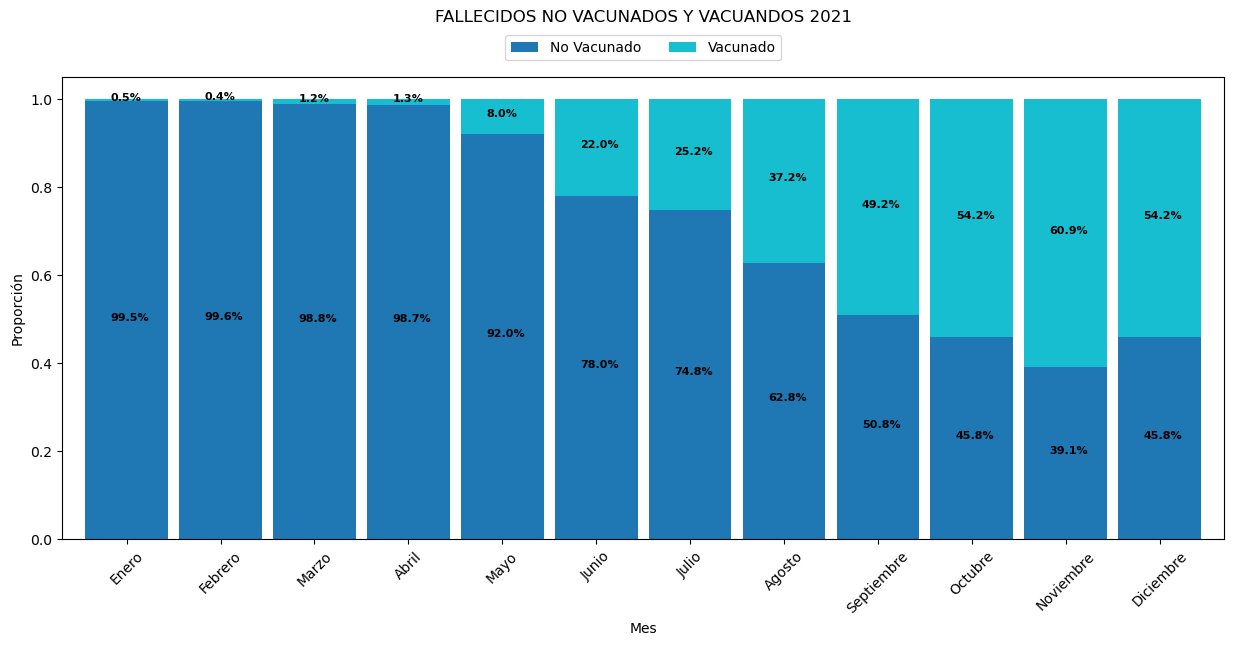

In [21]:
bar_covid(2021,'nombre_mes','vacunado_si_no')

La gráfica evidencia una tendencia decreciente en la proporción de mortalidad de "No Vacunados" por COVID-19 en hospitales durante el año 2021. En particular, se observa que en el mes de enero la proporción de mortalidad en esta población alcanzó su valor máximo, con un 99.5%, mientras que en noviembre se registró la proporción más baja, con un 39.1%.

Además, a partir del mes de octubre, por primera vez en el período evaluado, se observó que la proporción de mortalidad de "No Vacunados" fue menor que los "Vacunados", manteniéndose esta tendencia hasta finales de año. En concreto, en octubre la proporción de mortalidad fue del 45.8% para "No Vacunados" y del 54.2% para "Vacunados"; en noviembre, la proporción fue de 39.1% para "No Vacunados" y de 69.9% para "Vacunados"; en diciembre sla proporción fue de 45.8% para "No Vacunados" y de 54.2% para "Vacunados".

Estos resultados sugieren que la vacunación puede no estar asociada a una reducción de la mortalidad por COVID-19 en los hospitales.

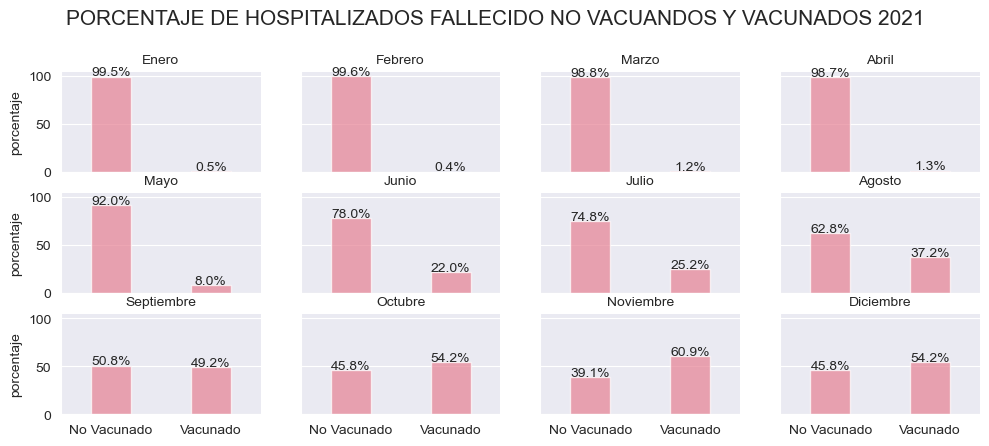

In [22]:
# Calcular los porcentajes para 'vacuando_si_no' en cada mes
porcentajes = df_HFV[df_HFV['año']==2021].groupby(['nombre_mes', 'vacunado_si_no']).size().reset_index(name='porcentaje')
porcentajes.sort_values('nombre_mes', key = lambda x : x.apply (lambda x : mes_orden[x]), inplace=True)
porcentajes['porcentaje'] /= porcentajes.groupby('nombre_mes')['porcentaje'].transform('sum') / 100

# Crear gráfico de barras con porcentajes por separado para cada mes
sns.set_style('darkgrid')
sns.set_palette('husl')

g = sns.FacetGrid(porcentajes, col='nombre_mes', col_wrap=4, height=2.5)
g.map(sns.barplot, 'vacunado_si_no', 'porcentaje', order=['No Vacunado', 'Vacunado'], alpha=.7, width=0.4)

# Agregar porcentaje en cada barra
for ax in g.axes.flat:
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + 1
        value = '{:.1f}%'.format(p.get_height())
        ax.annotate(value, (x, y), ha='center')

# Agregar título general
plt.suptitle('PORCENTAJE DE HOSPITALIZADOS FALLECIDO NO VACUANDOS Y VACUNADOS 2021', fontsize=15, y=1.04)
# Agregar título a cada subgráfico
g.set_titles("{col_name}")
# Ajustar espacio entre subgráficos
g.fig.subplots_adjust(bottom=0.5, wspace=0.2)
# Quitar nombre del eje x
g.set(xlabel=None)

plt.show()

La gráfica evidencia una tendencia decreciente en la proporción de mortalidad de "No Vacunados" por COVID-19 en hospitales durante el año 2021. En particular, se observa que en el mes de enero la proporción de mortalidad en esta población alcanzó su valor máximo, con un 99.5%, mientras que en noviembre se registró la proporción más baja, con un 39.1%.

Además, a partir del mes de octubre, por primera vez en el período evaluado, se observó que la proporción de mortalidad de "No Vacunados" fue menor que los "Vacunados", manteniéndose esta tendencia hasta finales de año. En concreto, en octubre la proporción de mortalidad fue del 45.8% para "No Vacunados" y del 54.2% para "Vacunados"; en noviembre, la proporción fue de 39.1% para "No Vacunados" y de 69.9% para "Vacunados"; en diciembre sla proporción fue de 45.8% para "No Vacunados" y de 54.2% para "Vacunados".

Estos resultados sugieren que la vacunación puede no estar asociada a una reducción de la mortalidad por COVID-19 en los hospitales.

*Esta gráfica tiene la misma lectura que el anterior, solo se cambió el diseño y se dividió en meses.*

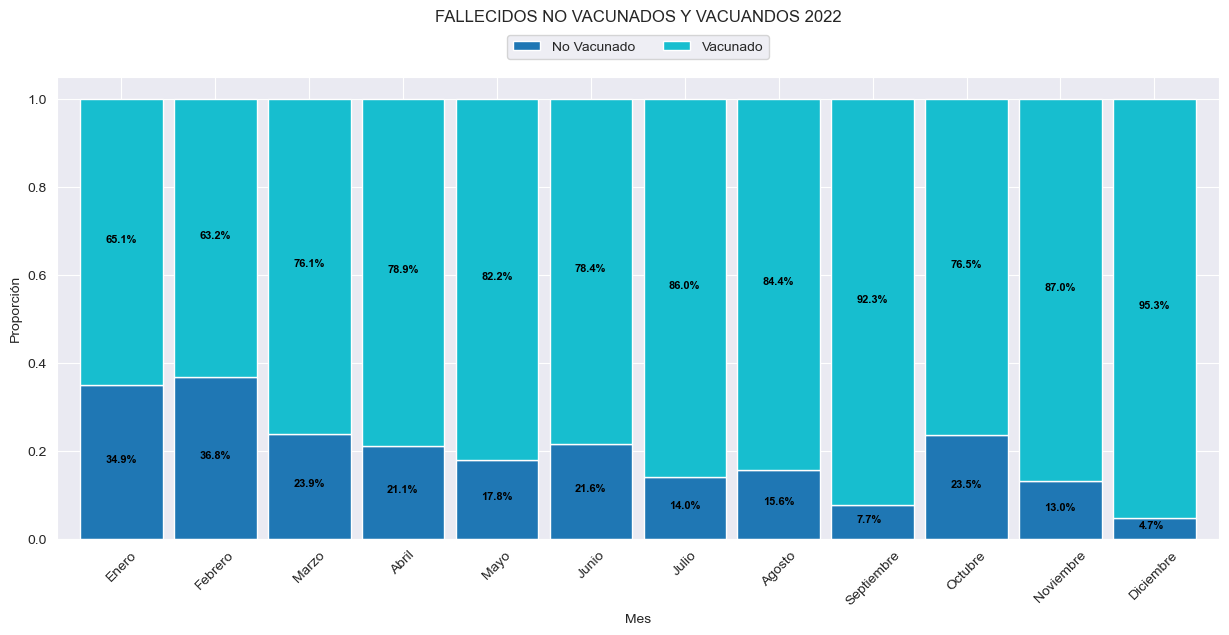

In [23]:
bar_covid(2022,'nombre_mes','vacunado_si_no')

La gráfica del período 2022 muestra que la proporción de mortalidad de "Vacunados" por COVID-19 en hospitales aumentó en comparación con el período anterior. Asimismo, se observa que la proporción de mortalidad de "No Vacunados" fue menor que los "Vacunados" a lo largo del año, desde enero hasta diciembre.

Se evidencia una tendencia decreciente en la proporción de mortalidad de "No Vacunados" durante todo el período, con el mes de febrero presentando la proporción más alta y diciembre la más baja. En febrero, la proporción de mortalidad fue del 36.8% para pacientes "No Vacunados" y del 63.2% para pacientes "Vacunados", mientras que en diciembre la proporción fue del 4.7% para "No Vacunados" y del 95.3% para "Vacunados".

Estos hallazgos sugieren que la vacunación puede ser no efectiva para reducir la mortalidad por "COVID-19" en los hospitales, ya que la proporción de mortalidad de "Vacunados" aumento en el período 2022 en comparación con el año anterior.

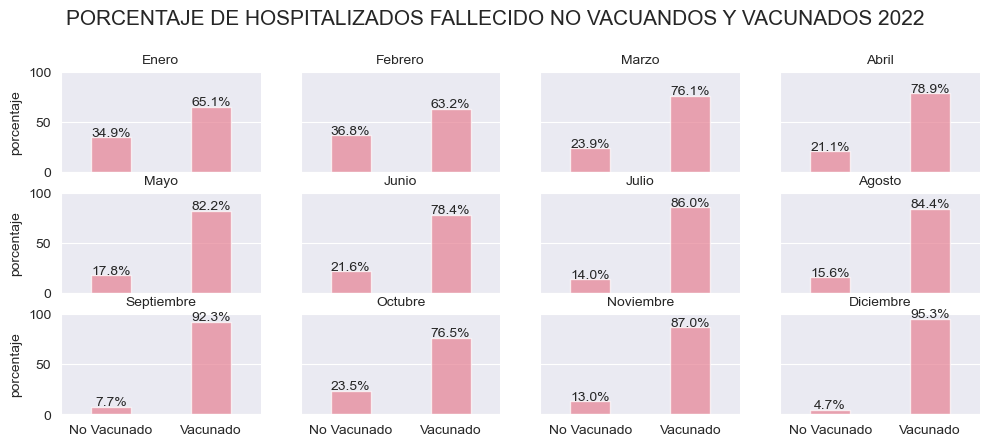

In [24]:
# Calcular los porcentajes para 'vacuando_si_no' en cada mes
porcentajes = df_HFV[df_HFV['año']==2022].groupby(['nombre_mes', 'vacunado_si_no']).size().reset_index(name='porcentaje')
porcentajes.sort_values('nombre_mes', key = lambda x : x.apply (lambda x : mes_orden[x]), inplace=True)
porcentajes['porcentaje'] /= porcentajes.groupby('nombre_mes')['porcentaje'].transform('sum') / 100

# Crear gráfico de barras con porcentajes por separado para cada mes
sns.set_style('darkgrid')
sns.set_palette('husl')

g = sns.FacetGrid(porcentajes, col='nombre_mes', col_wrap=4, height=2.5)
g.map(sns.barplot, 'vacunado_si_no', 'porcentaje', order=['No Vacunado', 'Vacunado'], alpha=.7, width=0.4)

# Agregar porcentaje en cada barra
for ax in g.axes.flat:
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + 1
        value = '{:.1f}%'.format(p.get_height())
        ax.annotate(value, (x, y), ha='center')

# Agregar título general
plt.suptitle('PORCENTAJE DE HOSPITALIZADOS FALLECIDO NO VACUANDOS Y VACUNADOS 2022', fontsize=15, y=1.04)
# Agregar título a cada subgráfico
g.set_titles("{col_name}")
# Ajustar espacio entre subgráficos
g.fig.subplots_adjust(bottom=0.5, wspace=0.2)
# Quitar nombre del eje x
g.set(xlabel=None)

plt.show()

La gráfica del período 2022 muestra que la proporción de mortalidad de "Vacunados" por COVID-19 en hospitales aumentó en comparación con el período anterior. Asimismo, se observa que la proporción de mortalidad de "No Vacunados" fue menor que los "Vacunados" a lo largo del año, desde enero hasta diciembre.

Se evidencia una tendencia decreciente en la proporción de mortalidad de "No Vacunados" durante todo el período, con el mes de febrero presentando la proporción más alta y diciembre la más baja. En febrero, la proporción de mortalidad fue del 36.8% para pacientes "No Vacunados" y del 63.2% para pacientes "Vacunados", mientras que en diciembre la proporción fue del 4.7% para "No Vacunados" y del 95.3% para "Vacunados".

Estos hallazgos sugieren que la vacunación puede ser no efectiva para reducir la mortalidad por "COVID-19" en los hospitales, ya que la proporción de mortalidad de "Vacunados" aumento en el período 2022 en comparación con el año anterior.

*Esta gráfica tiene la misma lectura que el anterior, solo se cambió el diseño y se dividió en meses.*

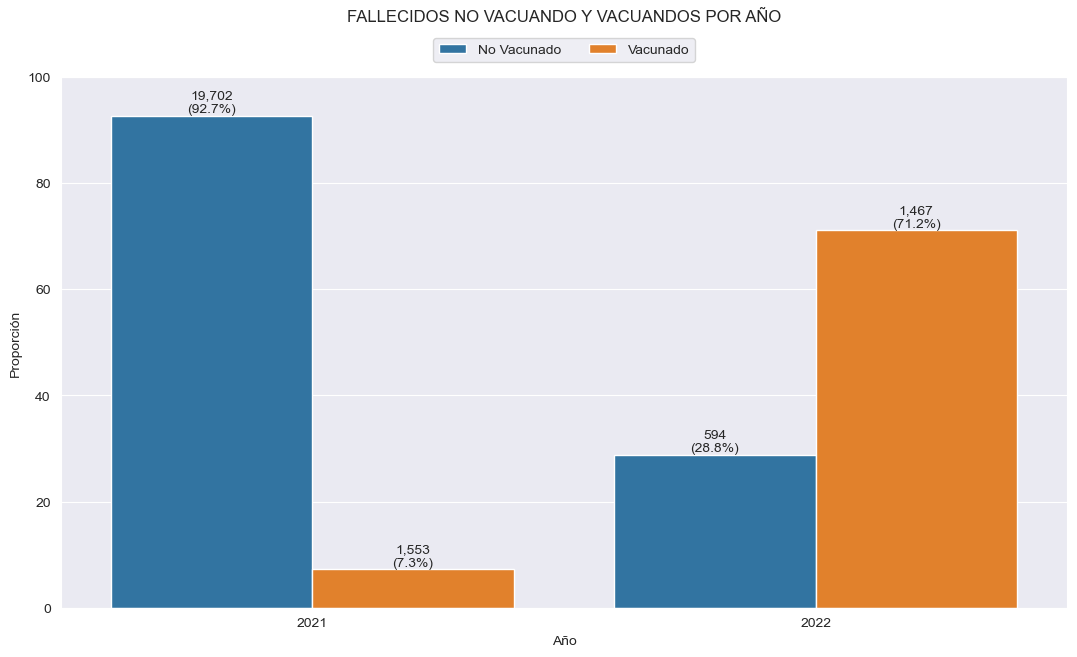

In [25]:
# Filtrar los datos del año 2021 y 2022
df_filtrado = df_HFV.query('año == 2021 or año == 2022')

# Crear columna cantidad
df_cantidad = df_filtrado.groupby(['año', 'vacunado_si_no']).size().reset_index(name='cantidad')

# Calcular los porcentajes para 'vacuando_si_no' por año.
df_porcentaje = df_filtrado.groupby('año')['vacunado_si_no'].value_counts(normalize=True).mul(100).rename('porcentaje').reset_index()

# Crear un gráfico de barras usando seaborn
g = sns.catplot(x='año', y='porcentaje', hue='vacunado_si_no', kind='bar', palette='tab10', data=df_porcentaje, height=6, aspect=1.8, legend=False)


# Agregar etiquetas con los valores porcentuales y las cantidades al gráfico
for ax in g.axes.flat:
    for p, q in zip(ax.containers[::2], ax.containers[1::2]):
        ax.bar_label(p, label_type='edge', labels=[f'{df_cantidad.iloc[i*2]["cantidad"]:,}\n({val:.1f}%)' for i, val in enumerate(p.datavalues)], fontsize=10)
        ax.bar_label(q, label_type='edge', labels=[f'{df_cantidad.iloc[i*2+1]["cantidad"]:,}\n({val:.1f}%)' for i, val in enumerate(q.datavalues)], fontsize=10)

# Establecer el rango del eje y
g.set(ylim=(0, 100))

# Colocar la leyenda arriba y centrada
plt.legend(loc=9, ncol=2, borderaxespad = -2.8)
# Eliminar la cuadrícula base del gráfico
sns.despine(top=False,right=False)
# Agregar título y etiquetas de los ejes
plt.title('FALLECIDOS NO VACUANDO Y VACUANDOS POR AÑO', pad = 5*8)
plt.xlabel('Año')
plt.ylabel('Proporción')

# Mostrar el gráfico
plt.show()

A partir de los datos presentados en el gráfico, se puede observar que la proporción de fallecidos hospitalizados por COVID-19 en el período de 2021 estuvo compuesta mayoritariamente por individuos no vacunados, alcanzando un total de 19,702, lo que representa el 92.7% del total de fallecidos registrados en ese año. Por otro lado, la cantidad de fallecidos vacunados en 2021 fue significativamente menor, representando tan solo el 7.3% del total, con un registro de 1,553 individuos. El total de fallecidos hospitalizados por COVID-19 en 2021 fue de 21,255 individuos.

En cuanto a los datos del año 2022, se evidencia una importante disminución en la cantidad de fallecidos no vacunados, con un registro de 594 individuos, lo que representa el 28.8% del total de fallecidos en ese período. Por su parte, la cantidad de fallecidos vacunados en 2022 fue de 1,467 individuos, lo que representa el 71.2% del total de fallecidos registrados en ese año. El total de fallecidos hospitalizados por COVID-19 en 2022 fue de 2,061 individuos.

Es importante destacar que, al comparar los datos de los años 2021 y 2022, se observa una drástica reducción en la cantidad de fallecidos no vacunados, con un descenso de -19,108 individuos en este grupo. En contraste, la cantidad de fallecidos vacunados solo disminuyó en -86 individuos en el mismo período. La cantidad total de fallecidos también evidenció una disminución significativa, con un descenso de -19,194 individuos del 2021 al 2022.

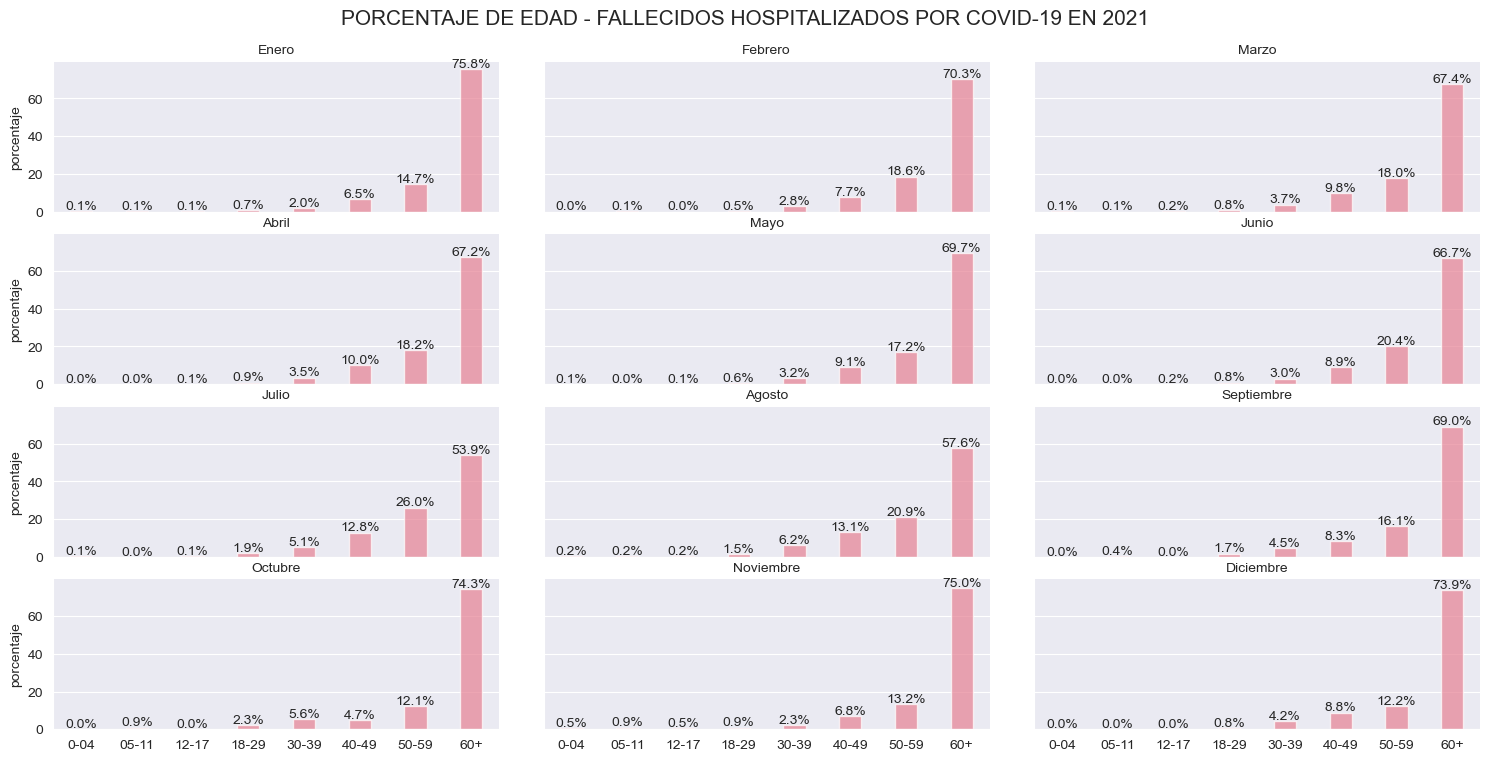

In [26]:
# Calcular los porcentajes de intervalos del 'grupo_edad' en cada mes
porcentajes = df_HFV[df_HFV['año']==2021].groupby(['nombre_mes', 'grupo_edad']).size().reset_index(name='porcentaje')
porcentajes.sort_values('nombre_mes', key = lambda x : x.apply (lambda x : mes_orden[x]), inplace=True)
porcentajes['porcentaje'] /= porcentajes.groupby('nombre_mes')['porcentaje'].transform('sum') / 100

# Crear gráfico de barras con porcentajes por separado para cada mes
sns.set_style('darkgrid')
sns.set_palette('husl')
g = sns.FacetGrid(porcentajes, col='nombre_mes', col_wrap=3, height=5)
g.map(sns.barplot, 'grupo_edad', 'porcentaje', order=['0-04','05-11','12-17','18-29','30-39','40-49','50-59','60+'] ,alpha=.7, width=0.4)

# Agregar etiqueta porcentaje en cada barra
for ax in g.axes.flat:
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + 1
        value = '{:.1f}%'.format(p.get_height())
        ax.annotate(value, (x, y), ha='center')

# Agregar título general
plt.suptitle('PORCENTAJE DE EDAD - FALLECIDOS HOSPITALIZADOS POR COVID-19 EN 2021', fontsize=15, y=1.01)
# Agregar título a cada subgráfico
g.set_titles('{col_name}')
# Ajustar espacio entre subgráficos
g.fig.subplots_adjust(bottom=0.65, wspace=0.1, hspace=0.15)
# Quitar nombre del eje x
g.set(xlabel=None)

plt.show()

El gráfico muestra que durante el periodo de 2021, la mayor proporción de fallecidos por COVID-19 se registró en el grupo de 60 años o más. Esta tendencia se mantuvo constante en todos los meses del año. Además, se observó que en los grupos de edades de "18 a 29", "30 a 39", "40 a 49" y "50 a 59" se presentó una menor proporción de fallecimientos en comparación con el grupo de 60 años o más. También se registraron fallecimientos en los grupos de edades de "0 a 4", "5 a 11" y "12 a 17", aunque en menor medida.

Es importante destacar que aunque la proporción de fallecidos en los grupos de edades de "18 a 29", "30 a 39", "40 a 49" y "50 a 59" es menor que en el grupo de 60 años o más, cualquier fallecimiento por COVID-19 es una pérdida lamentable y sigue siendo una preocupación de salud pública.

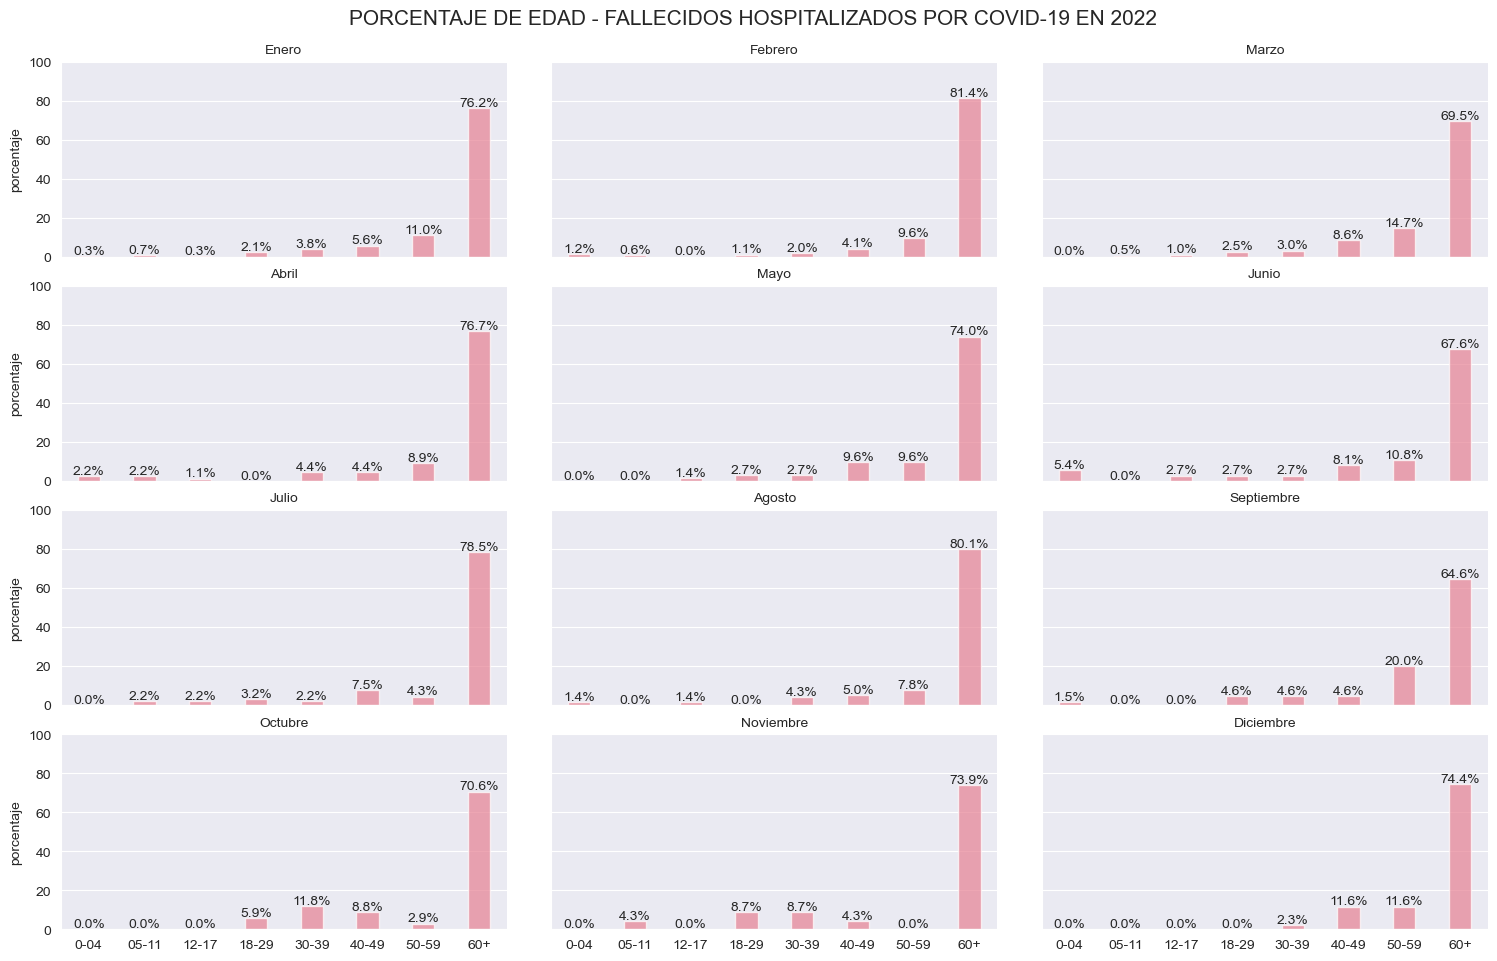

In [27]:
# Calcular los porcentajes por del 'grupo_edad' en cada mes
porcentajes = df_HFV[df_HFV['año']==2022].groupby(['nombre_mes', 'grupo_edad']).size().reset_index(name='porcentaje')
porcentajes.sort_values('nombre_mes', key = lambda x : x.apply (lambda x : mes_orden[x]), inplace=True) # Ordenar los meses
porcentajes['porcentaje'] /= porcentajes.groupby('nombre_mes')['porcentaje'].transform('sum') / 100

# Crear gráfico de barras con porcentajes por separado para cada mes
sns.set_style('darkgrid')
sns.set_palette('husl')
g = sns.FacetGrid(porcentajes, col='nombre_mes', col_wrap=3, height=5)
g.map(sns.barplot, 'grupo_edad', 'porcentaje', order=['0-04','05-11','12-17','18-29','30-39','40-49','50-59','60+'] ,alpha=.7, width=0.4)

# Agregar etiqueta porcentaje en cada barra
for ax in g.axes.flat:
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + 1
        value = '{:.1f}%'.format(p.get_height())
        ax.annotate(value, (x, y), ha='center')

plt.suptitle('PORCENTAJE DE EDAD - FALLECIDOS HOSPITALIZADOS POR COVID-19 EN 2022', fontsize=15, y=1.01)
# Establecer el rango del eje y
g.set(ylim=(0, 100))
# Agregar título a cada subgráfico
g.set_titles('{col_name}')
# Ajustar espacio entre subgráficos
g.fig.subplots_adjust(bottom=0.55, wspace=0.1, hspace=0.15)
# Quitar nombre del eje x
g.set(xlabel=None)
plt.show()

El gráfico muestra que durante el periodo de 2022, la mayor proporción de fallecidos por COVID-19 se registró en el grupo de 60 años o más. Esta tendencia se mantuvo constante en todos los meses del año. Además, se observó que en los grupos de edades de "18 a 29", "30 a 39", "40 a 49" y "50 a 59" se presentó una menor proporción de fallecimientos en comparación con el grupo de 60 años o más. También se registraron fallecimientos en los grupos de edades de "0 a 4", "5 a 11" y "12 a 17", aunque en menor medida.

Es importante destacar que aunque la proporción de fallecidos en los grupos de edades de "18 a 29", "30 a 39", "40 a 49" y "50 a 59" es menor que en el grupo de 60 años o más, cualquier fallecimiento por COVID-19 es una pérdida lamentable y sigue siendo una preocupación de salud pública.

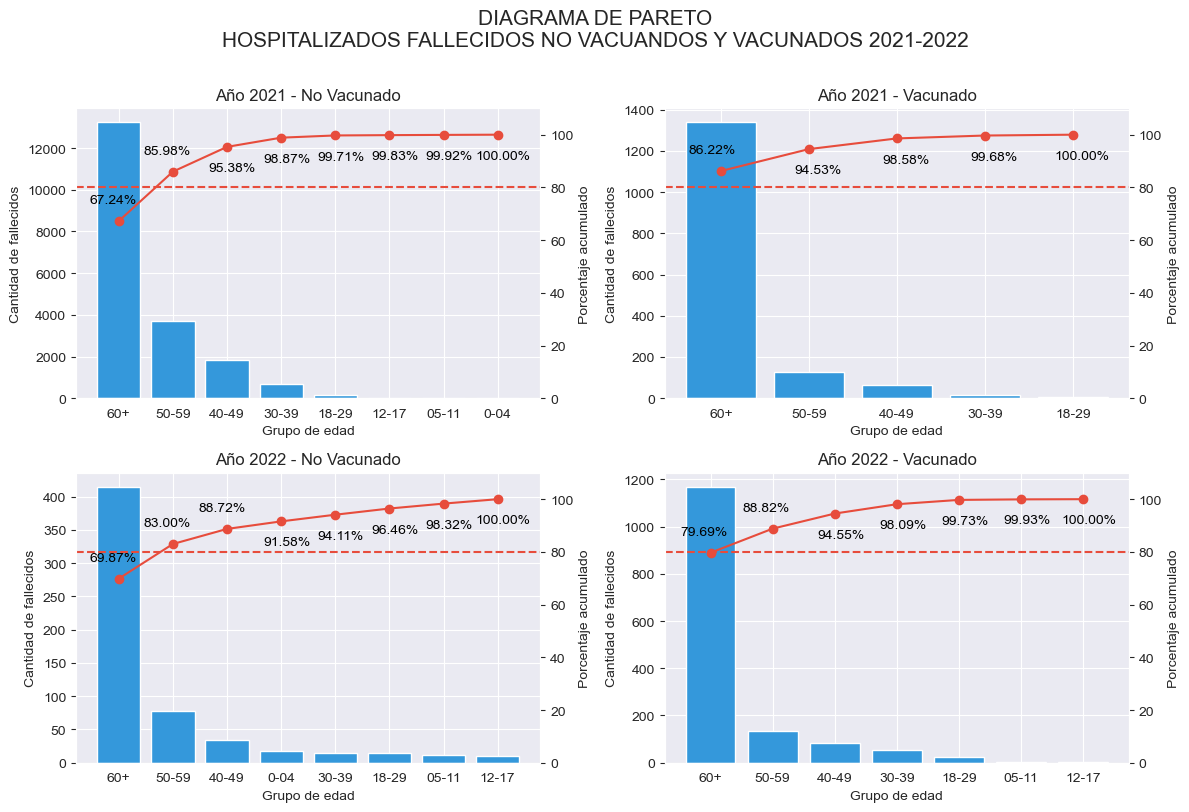

In [28]:
# Calcular el número de personas por edad y vacunado_si_no
tabla_frecuecia_absoluta = df_filtrado.groupby(['año', 'vacunado_si_no', 'grupo_edad']).size().reset_index(name='cantidad')
tabla_frecuecia_absoluta = tabla_frecuecia_absoluta.sort_values(by=['año', 'vacunado_si_no', 'cantidad'], ascending=[True, True, False])

# Calcular la suma acumulada de personas por edad y vacunado_si_no
tabla_frecuecia_absoluta['cantidad_acumulada'] = tabla_frecuecia_absoluta.groupby(['año', 'vacunado_si_no'])['cantidad'].cumsum()

# Crear un diagrama de Pareto separado por 'año' y 'grupo_edad'
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
counter = 0
for i, año_covid in enumerate(tabla_frecuecia_absoluta.año.unique()):
    for j, edad_covid in enumerate(['No Vacunado', 'Vacunado']):
        # Crear tabla de la frecuencia acumulada
        data = tabla_frecuecia_absoluta[(tabla_frecuecia_absoluta['año'] == año_covid) & (tabla_frecuecia_absoluta['vacunado_si_no'] == edad_covid)]
        data = data.sort_values(by='cantidad', ascending=False)
        data['porcentaje_acumulado'] = data['cantidad_acumulada'] / data['cantidad'].sum()* 100
        data = data.round({'porcentaje_acumulado':2})
        ax_row = counter // 2
        ax_col = counter % 2
        # Agregamos el gráfico de barras
        ax[ax_row, ax_col].bar(data['grupo_edad'], data['cantidad'], color='#3498DB')
        ax[ax_row, ax_col].set_xlabel('Grupo de edad')
        ax[ax_row, ax_col].set_ylabel('Cantidad de fallecidos')
        ax2 = ax[ax_row, ax_col].twinx()
        # Agregamos el gráfico de linea
        ax2.plot(data['grupo_edad'], data['porcentaje_acumulado'], color='#E74C3C', marker='o')
        ax2.set_ylim(0, 110)
        ax2.set_ylabel('Porcentaje acumulado')
        ax2.grid(False)
        ax[ax_row, ax_col].set_title(f'Año {año_covid} - {edad_covid}')
        # Agregar una línea horizontal en el 80%
        ax2.axhline(y=80, color='#E74C3C', linestyle='--')
        # Agregar las etiquetas %
        for x_val, y_val in zip (range(len(data)), data["porcentaje_acumulado"]):
            # Establecer el formato del texto en %
            text = f"{y_val/100:.2%}"

            # Colocar las etiquetas de texto en el gráfico
            if y_val > 90:
                ax2.text(
                    x=x_val+0.1,
                    y=y_val-8,
                    s=text,
                    fontsize=10,
                    color="black",
                    ha="center",
                    va="center"
                    )
            else:
                ax2.text(
                    x=x_val-0.1,
                    y=y_val+8,
                    s=text,
                    fontsize=10,
                    color="black",
                    ha="center",
                    va="center"
                    )
        counter += 1
plt.suptitle('DIAGRAMA DE PARETO\nHOSPITALIZADOS FALLECIDOS NO VACUANDOS Y VACUNADOS 2021-2022', fontsize=15, y=1.01)
plt.tight_layout()
plt.show()

En 2021, se observó que el 85.98% de los decesos en hospitales por COVID-19 entre los no vacunados correspondían a personas de 50 a 59 años y 60 años o más. Por otro lado, el 86.22% de los fallecidos entre los vacunados correspondían a personas de 60 años o más.

En 2022, se observó que el 83.00% de los decesos en hospitales por COVID-19 entre los no vacunados correspondían a personas de 50 a 59 años y 60 años o más. Por otro lado, el 88.82% de los fallecidos entre los vacunados correspondían a personas de 50 a 59 años y 60 años o más.

Estos datos sugieren que durante ambos años, se presentó una mayor concentración de decesos por COVID-19 en la población de 60 años o más, tanto en el grupo de individuos vacunados como en el de no vacunados.

In [29]:
# Calcular la 'frecuencia_absoluta'
tabla_frecuecia = df_filtrado.groupby(['año', 'vacunado_si_no', 'grupo_edad']).size().reset_index(name='frecuencia_absoluta')
tabla_frecuecia = tabla_frecuecia.sort_values(by=['año', 'vacunado_si_no', 'frecuencia_absoluta'], ascending=[True, True, False])

# Calcular la suma acumulada de personas por 'año' y 'vacunado_si_no'
tabla_frecuecia['frecuencia_absoluta_acumulada'] = tabla_frecuecia.groupby(['año', 'vacunado_si_no'],group_keys=False)['frecuencia_absoluta'].cumsum()

# Calcular la frecuencia relativa por 'año' y 'vacunado_si_no'
tabla_frecuecia['frecuencia_relativa'] = tabla_frecuecia.groupby(['año', 'vacunado_si_no'], group_keys=False)['frecuencia_absoluta'].apply(lambda x: x / x.sum()*100).round(2)

# Calcular la frecuencia relativa acumulada por 'año' y 'vacunado_si_no'
tabla_frecuecia['frecuencia_relativa_acumulada'] = tabla_frecuecia.groupby(['año', 'vacunado_si_no'], group_keys=False)['frecuencia_relativa'].cumsum()
tabla_frecuecia.reset_index(drop=True, inplace=True)
tabla_frecuecia

,año,vacunado_si_no,grupo_edad,frecuencia_absoluta,frecuencia_absoluta_acumulada,frecuencia_relativa,frecuencia_relativa_acumulada
0,2021,No Vacunado,60+,13247,13247,67.24,67.24
1,2021,No Vacunado,50-59,3692,16939,18.74,85.98
2,2021,No Vacunado,40-49,1852,18791,9.40,95.38
3,2021,No Vacunado,30-39,688,19479,3.49,98.87
4,2021,No Vacunado,18-29,166,19645,0.84,99.71
5,2021,No Vacunado,12-17,24,19669,0.12,99.83
6,2021,No Vacunado,05-11,17,19686,0.09,99.92
7,2021,No Vacunado,0-04,16,19702,0.08,100.00
8,2021,Vacunado,60+,1339,1339,86.22,86.22
9,2021,Vacunado,50-59,129,1468,8.31,94.53


## <center>Distribución de frecuencia de fallecidos en hospitales según su estado de vacunación en los años 2021 y 2022</center>

#### En el siguiente análisis, se muestra una tabla de frecuencia que describe la distribución de fallecimientos por covid en hospitales en el año 2021.

| Condición de vacunación | Grupo de edad | Número de fallecidos | Porcentaje del total | Porcentaje Acumulado |
| --- | --- | --- | --- | --- |
| No vacunado | 60 años o más | 13,247 | 67.24% | 67.24% |
| No vacunado | 50-59 años | 3,692 | 18.74% | 85.98% |
| No vacunado | 0-49 años | 2,763 | 14.02% | 100.00% |
| Vacunado | 60 años o más | 1,339 | 86.22% | 86.22% |
| Vacunado | 50-59 años | 129 | 8.31% | 94.53% |
| Vacunado | 18-49 años | 85 | 5.47% | 100.00% |

*<center>En total, se registraron 19,702 fallecidos no vacunados y 1,553 fallecidos vacunados en 2021.</center>*

* **En el año 2021, se registraron 19,702 fallecidos "no vacunados" en total**, de los cuales 13,247 pertenecían al grupo etario de 60 años a más, representando el 67.24% del total de fallecidos "no vacunados". Asimismo, se reportaron 3,692 fallecidos en el rango de 50 a 59 años, lo que representa el 18.74% del total de fallecidos "no vacunados" en hospitales en ese año. En conjunto, estos grupos suman 16,939 de los fallecidos que representaron el 85.98% de los fallecidos "no vacunados" en hospitales en el 2021.

* **Por otro lado, en el mismo año se registraron un total de 1,553 fallecidos "vacunados"**, sin embargo, no se reportaron fallecidos "vacunados" menores de 18 años. De los fallecidos "vacunados" en el grupo etario de 60 años a más, se registraron 1,339 fallecidos, lo que representa el 86.22% del total de "vacunados".

#### En el siguiente análisis, se muestra una tabla de frecuencia que describe la distribución de fallecimientos por covid en hospitales en el año 2022.

| Condición de vacunación | Grupo de edad | Número de fallecidos | Porcentaje del total | Porcentaje Acumulado |
| --- | --- | --- | --- | --- |
| No vacunado | 60 años o más | 415 | 69.87% | 69.87% |
| No vacunado | 50-59 años | 78 | 13.13% | 83.00% |
| No vacunado | 0-49 años | 101 | 17.00% | 100.00 |
| Vacunado | 60 años o más | 1,169 | 79.69% | 79.69% |
| Vacunado | 50-59 años | 134 | 9.13% | 88.82% |
| Vacunado | 5-49 años | 164 | 11.18% | 100.00% |

*<center>En total, se registraron 594 fallecidos no vacunados y 1,467 fallecidos vacunados en 2021.</center>*

* **En el año 2022, se registraron 594 fallecidos "no vacunados"** en total, de los cuales 415 pertenecían al grupo etario de 60 años a más, representando el 69.87% del total de fallecidos "no vacunados". Asimismo, se reportaron 78 fallecidos en el rango de 50 a 59 años, lo que representa el 13.13% del total de fallecidos no vacunados en hospitales en ese año. En conjunto, estos grupos suman 493 que representaron el 83.00% de los fallecidos "no vacunados" en hospitales en el 2022.

* **Por otro lado, en el mismo año se registraron un total de 1,467 fallecidos "vacunados"**, sin embargo, no se reportaron fallecidos vacunados menores de 5 años. De los fallecidos vacunados en el grupo etario de 60 años a más, se registraron 1,169 fallecidos, lo que representa el 79.69% del total de fallecidos. Asimismo, en el rango de edad de 50 a 59 años se reportaron 134 fallecidos vacunados, lo que representa el 9.13% del total. En conjunto, estos grupos suman 1,303 que representaron el 88.82% de los fallecidos "vacunados" en hospitales en el 2022.

De estos datos, se puede concluir que la mayor cantidad de fallecidos se encuentra dentro de población de 60 a más. Además, en el año 2021 la cantidad de fallecidos "no vacunados" fue mayor que la cantidad de fallecidos vacunados, mientras que en el año 2022 la cantidad de fallecidos "no vacunados fue menor a los vacunados.

Cabe destacar que los datos presentados corresponden exclusivamente a la situación en hospitales y no incluyen fallecidos fuera de estos centros de atención médica.

Como analista de datos, es importante considerar estas tendencias en la distribución de las muertes por COVID-19 a lo largo del tiempo, lo que puede tener implicaciones significativas para la toma de decisiones en la salud pública y la estrategia de vacunación.